# Submission details
*   **Name**: Aditya Verma
*  **Student ID**: 12948511
*   **Task**: Image classification - Assignment 2
*   **Subject**: 42028 Deep Learning and Convolutional Neural Network - Autumn 2020
*   **DataSet**: Fruits 360 (https://www.kaggle.com/moltean/fruits)
*   **CNN Used**: ResNet50



Drive Mount

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Imports
Some of the basic libraries will be imported in this section

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands

from PIL import Image # for opening images
import random # for selecting random images

In [0]:
# To check the tensor flow version. It should be 2.2.0
!python -c 'import tensorflow as tf; print(tf.__version__)'

2020-05-31 08:07:17.405437: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2.2.0


In [0]:
#Changing to the working directory to access dataset
%cd /content/drive/My Drive/Assign_2/image-classification

/content/drive/My Drive/Assign_2/image-classification


#2. Data Preperation
This section will prepare the dataset for training



##2.1 Dataset Download
This will download the dataset from the website provided

In [0]:
# This function will be used later to extract ONLY jpg files from the downloaded file.
def jpg_files(members):
  for tarinfo in members: # to help access the zipped folder tarinfo will be imported
      if os.path.splitext(tarinfo.name)[1] == ".jpg":
          yield tarinfo

# In order to unzip the downloaded file this function will be called
def untar(fname,path="flower-dataset"): #filename of the dataset
    tar = tarfile.open(fname) # Assigning variable to dataset
    tar.extractall(path="flower-dataset", members=jpg_files(tar))
    tar.close() # closes the function after all steps have been completed

Downloading the dataset

In [0]:
#function for downloading from URL 
import tarfile # to unzip
import urllib #

work_directory = "flower-dataset" # Directory name for the dataset
source_url = "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/"
filename = "17flowers.tgz"
filepath = "flower-dataset"

# This if statement will check if folder exists
if not os.path.exists(work_directory): # will check if the folder is in empty to continue, will be skipped if dataset is already there
  os.mkdir(work_directory)
  print("Directory made")
filepath = os.path.join(work_directory, filename)

#this if statement will download the file
if not os.path.exists(filepath): # will check if the folder is in empty to continue, if dataset is not there it will download
  filepath, _ = urllib.request.urlretrieve(source_url + filename, # function to download dataset
                                            filepath)
  statinfo = os.stat(filepath)
  untar(filepath,work_directory) # unzips

##2.2 Dataset Visualisation

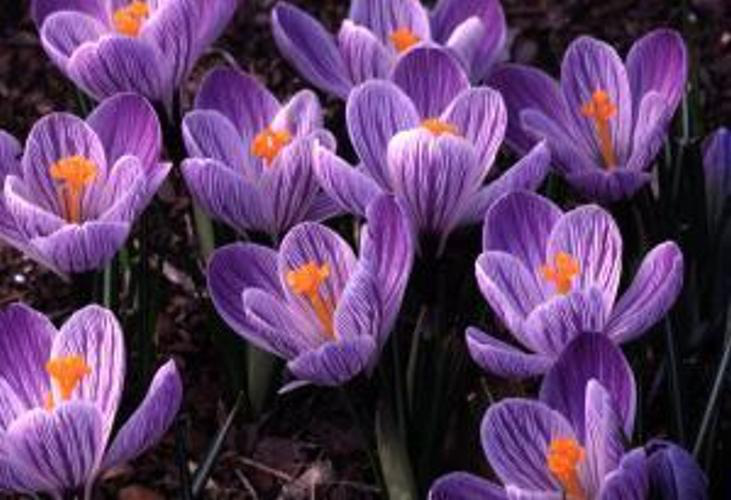

In [0]:
# will return one random image from the dataset for data visualisation
random_image = random.choice(os.listdir("flower-dataset/jpg/"))
Image.open("flower-dataset/jpg/"+random_image)

##2.3 Load all the Images
Expected: "1360"

In [0]:
# numpy arrays which will store the images and the corresponding labels
flower_imagee = []
labels = []
total = 1361 # The total number of images for the if loop
count = 1 # initial starting count

# function to load all the images in the folder in the images array
def load_data(fpath):    
  img=Image.open(fpath).resize((224,224)) # resize the images to 224 by 224 for training

  img = np.asarray( img, dtype='float32')

  return img # returns the loaded image

for i in range(1, total): 
  # will create images with new name   
  fname = "flower-dataset/jpg/image_" 
  fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")

  flower_imagee.append(load_data(fpath))

  labels.append(count) #labels are added to the labels array

  if i% 80 == 0: count += 1 #Iterate through images but stop after count reaches past 80 which is the number of images per class
    
# Returns the number of images and labels
print("Number of images", len(flower_imagee))
print("Number of labels", len(labels))

Number of images 1360
Number of labels 1360


##2.4 Convert to numpy arrays
Expected: (1360, 224, 224, 3)

In [0]:
images = np.asarray(flower_imagee) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
# Returns the image shapes
images.shape

(1360, 224, 224, 3)

##2.5 Splitting Images into training and test images
The following section will split the dataset into two directories, one being training and the other test. The dataset is split by 80% by using sklearn module

In [0]:
# split data into training and test
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, 
                                                                        labels, train_size = 0.8, 
                                                                        random_state =  104)

###2.5.1 Train and test images folder split

In [0]:
import cv2
import numpy as np

train_folder = 'train' # folder name
train_data = train_images # new variable for moving jpgs.

if not os.path.exists(train_folder): # created directory if directory does not exist
  os.mkdir(train_folder)

n = 0 # count
# Following if statement will move images into corresponding folder which is training. 
for i in train_data:
  label_n = train_labels[n][0] 
  train_subfolder = train_folder + "/" + str(label_n) 
  if not os.path.exists(train_subfolder): # This will create folders names by binary which will correspond to the flower class
      os.mkdir(train_subfolder)
      i =+ 1
  train_filepath =  train_subfolder + "/" + str(n)+ ".jpg"
  cv2.imwrite(train_filepath, train_data[n]) # moves the image into its corresponding folder
  n += 1 # count to track
  
print("images moved to training ")


images saved to subfolder


In [0]:
test_folder = 'test' # folder name
test_data = test_images

if not os.path.exists(test_folder): # created directory if directory does not exist
  os.mkdir(test_folder)

n = 0
# Following if statement will move images into corresponding folder which is training. 
for i in test_data:
  label_n = train_labels[n][0]
  test_subfolder = test_folder + "/" + str(label_n) 
  if not os.path.exists(test_subfolder): # This will create folders names by binary which will correspond to the flower class
      os.mkdir(test_subfolder)
      i =+ 1
  test_filepath =  test_subfolder + "/" + str(n)+ ".jpg"
  cv2.imwrite(test_filepath, test_data[n]) # moves the image into its corresponding folder
  n += 1 # count to track
print("images moves to test")


NameError: ignored

##2.6 Assigning directory to variable

In [0]:
train_dir = os.path.realpath('train') # assigning train directory a variable
validation_dir = os.path.realpath('test') # assignign test directory a variable
image_size = 224 # variable for image size

#3. **Base Line Model**
In this section, only the baseline ResNet 50 will be trained to make a prediction on the flowers dataset

Imports

In [0]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input

import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

##3.2 Importing Resnet which has been trained on imagenet
Here we will be adding resnet to our model

In [0]:
baseline_model = models.Sequential() # initialize the model

# Necessary libraries 
from keras import models
from keras import layers
from keras import optimizers

baseline_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet')) # add resnet50 to the model
baseline_model.add(Dense(17, activation='softmax')) # output layer for the model

baseline_model.layers[0].trainable = False # to not train first layer in resnet model as it is already trained with imagenet

In [0]:
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 17)                34833     
Total params: 23,622,545
Trainable params: 23,569,425
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
# Check the trainable status of the individual layers
for layer in baseline_model.layers:
    print(layer, layer.trainable)

<keras.engine.training.Model object at 0x7fd5272a3e80> False
<keras.layers.core.Dense object at 0x7fd527cddb70> True


##3.3 Data Augmentation
expected: Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255, # rescaling the image
      rotation_range=20, # rotating the image
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


##3.4 Check point

In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/tmp/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


##3.5 Compiling the model

In [0]:
baseline_model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-4), # optimzer
              metrics=['acc', 'top_k_categorical_accuracy']) #measures the accuracy

##3.6 Install Tensorboard to visualise progress of training process

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-05-26 01:28:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.84.169.173, 52.1.175.150, 54.164.74.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.84.169.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  31.3MB/s    in 0.4s    

2020-05-26 01:28:10 (31.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = train_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')


###3.6.1 Get Tensorboard link

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://32429e36.ngrok.io


##3.7 Running the Model

In [0]:
history = baseline_model.fit_generator(
      train_generator, # the train data being processed from the data augmentation
      steps_per_epoch=train_generator.samples/train_generator.batch_size, # specifies the number of steps per epoc
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks = [checkpoint],      
      verbose=2)
       #Displays the progress bar

Epoch 1/15
 - 307s - loss: 0.2215 - acc: 0.9409 - top_k_categorical_accuracy: 0.4715 - val_loss: 0.3198 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3088
Epoch 2/15
 - 274s - loss: 0.1859 - acc: 0.9414 - top_k_categorical_accuracy: 0.7381 - val_loss: 0.3240 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3199
Epoch 3/15
 - 266s - loss: 0.1612 - acc: 0.9428 - top_k_categorical_accuracy: 0.8676 - val_loss: 0.3269 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3162
Epoch 4/15
 - 267s - loss: 0.1396 - acc: 0.9461 - top_k_categorical_accuracy: 0.9237 - val_loss: 0.3275 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3162
Epoch 5/15
 - 270s - loss: 0.1221 - acc: 0.9509 - top_k_categorical_accuracy: 0.9568 - val_loss: 0.3315 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3162
Epoch 6/15
 - 273s - loss: 0.1061 - acc: 0.9580 - top_k_categorical_accuracy: 0.9651 - val_loss: 0.3343 - val_acc: 0.9412 - val_top_k_categorical_accuracy: 0.3162
Epoch 7/15
 - 269s - l

##3.8 Printing out the test and training set accuracy

In [0]:
!python3 -c 'import tensorflow as tf; print(tf.__version__)'
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

2020-05-26 02:46:41.447097: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2.2.0
training acc.: 0.989349 
 test acc.: 0.941176176071167


##3.9 Visualisation of the training process

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[16,6])
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='valid_loss')
ax1.legend()
ax2.plot(history.history['acc'], label='train_acc')
ax2.plot(history.history['val_acc'], label='valid_acc')
ax2.legend();

#4. **Fine Tuning ResNet50**

##4.1 Fine Tuning 

In [0]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input

import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [0]:
# Load ResNet50 Trained on imagenet
conv_base = ResNet50(weights="imagenet",include_top=False, input_shape=(224, 224, 3))

from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of ResNet50 model and add the FC layers

finetune_model = Sequential() #model with type sequential rather than the functional api


finetune_model.add(conv_base)
finetune_model.add(layers.Flatten()) #flattening layer after the ResNet Model
finetune_model.add(layers.Dense(1024, activation='relu'))
finetune_model.add(layers.Dropout(0.5)) # To avoid overfitting
finetune_model.add(layers.Dense(17, activation='sigmoid')) # output layer

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
for layer in model.layers: #Freezing all of the layers so that they are untrainable meaning that the weights are not updated
    layer.trainable = False

In [0]:
finetune_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                17425     
Total params: 126,366,609
Trainable params: 126,313,489
Non-trainable params: 53,120
_________________________________________________________________


In [0]:

for layer in conv_base.layers[:-4]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

##4.2 Data Augmentation
expected: Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical',
        shuffle=False)

##4.3 Check point

In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/tmp/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


##4.4 Compiling the model

In [0]:
finetune_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['acc', 'top_k_categorical_accuracy'])

##4.5 Install Tensorboard to visualise progress of training process

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-05-24 08:00:43--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.223.249.113, 50.17.2.180, 34.238.5.126, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.223.249.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.3’

ngrok-stable-linux- 100%[===================>]  13.13M  29.4MB/s    in 0.4s    

2020-05-24 08:00:43 (29.4 MB/s) - ‘ngrok-stable-linux-amd64.zip.3’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = train_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')


In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://f46bfcdf.ngrok.io


##4.5 Running the Model

In [0]:
history = finetune_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks = [checkpoint],      
      verbose=2)
       #Displays the progress bar

##Printing out the test and training set accuracy

In [0]:
!python3 -c 'import tensorflow as tf; print(tf.__version__)'
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

2020-05-26 06:45:53.800121: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2.2.0
training acc.: 0.99529636 
 test acc.: 0.9403111338615417


##Visualisation of the training process

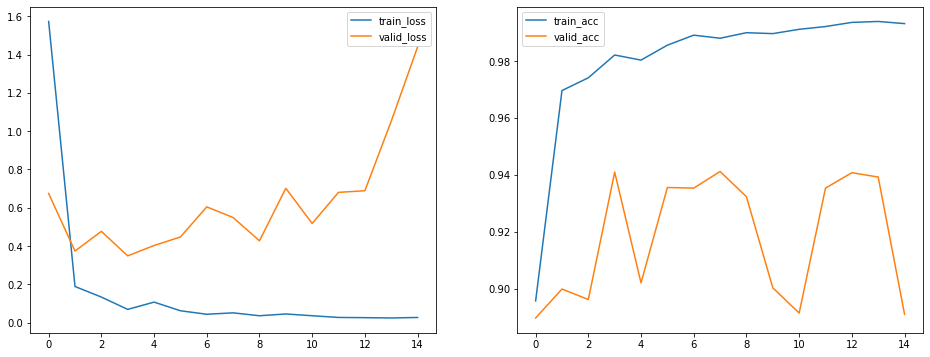

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[16,6])
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='valid_loss')
ax1.legend()
ax2.plot(history.history['acc'], label='train_acc')
ax2.plot(history.history['val_acc'], label='valid_acc')
ax2.legend();